In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as la

import sympy as sym

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

# Analytic test functions

We will assume a continuous piece-wise-smooth function with a cusp at $x = c\cdot h$ for some $c \in (0, 1)$. We have sampled the function at locations $x_i = i h$ for $i = -n+1, \dots, n$ for some number of points $n$ on each side.

In [133]:
# Define test functions analytically
c = 2/7
h = .01
n = 5

f_left = lambda x: -2*np.sin(x)
f_right = lambda x: np.exp(-x)

# make it continuous
f_right_adjusted = lambda x: f_right(x) - f_right(c*h) + f_left(c*h)
exact_unscaled = lambda x: np.heaviside(c*h - x,.5)*f_left(x) + np.heaviside(x - c*h, .5)*f_right_adjusted(x)
exact = lambda x: exact_unscaled(x*h)
# exact = exact_unscaled



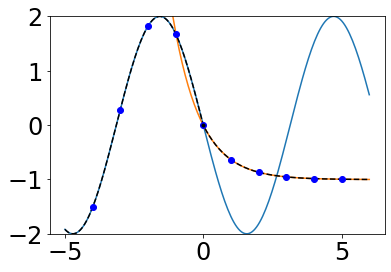

In [134]:
zs = np.linspace(-n, n+1, 201)
xs = np.arange(-n+1, n+1)

plt.plot(zs, f_left(zs))
plt.plot(zs, f_right_adjusted(zs))

plt.plot(zs, exact_unscaled(zs), 'k--')
plt.plot(xs, exact_unscaled(xs), 'bo')
plt.plot(c*h, exact_unscaled(c*h), 'k.')

plt.ylim(-2, 2)
plt.show()

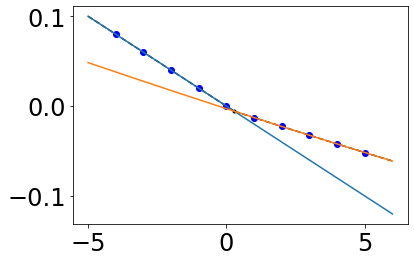

In [135]:
zs = np.linspace(-n, n+1, 201)
xs = np.arange(-n+1, n+1)

# plt.plot(zs, f_left(zs*h))
# plt.plot(zs, f_right_adjusted(zs*h))



plt.plot(zs, exact(zs), 'k--')
plt.plot(xs, exact(xs), 'bo')
plt.plot(c, exact(c), 'k.')

coeffs_left = la.solve( np.array([xs[:n]**i for i in range(n)]).T, exact(xs[:n]) )
ps_left = sum([ c*zs**i for i,c in enumerate(coeffs_left) ])
plt.plot(zs, ps_left)

coeffs_right = la.solve( np.array([xs[n:]**i for i in range(n)]).T, exact(xs[n:]) )
ps_right = sum([ c*zs**i for i,c in enumerate(coeffs_right) ])
plt.plot(zs, ps_right)

p = lambda x: sum([ c*x**i for i,c in enumerate(coeffs_left - coeffs_right) ])
d_coeffs = [i*c for i,c in enumerate(coeffs_left - coeffs_right)][1:]
dp = lambda x: sum([ c*x**i for i,c in enumerate(d_coeffs)])

x = 0
for i in range(5):
    x -= p(x)/dp(x)
                                     
# plt.ylim(-2, 2)
plt.show()

In [167]:
hs = [.5**i for i in range(10)]
errors = []
for h in hs:
    exact = lambda x: exact_unscaled(x*h)
    xs = np.arange(-n+1, n+1)
    
    coeffs_left = la.solve( np.array([xs[:n]**i for i in range(n)]).T, exact(xs[:n]) )
    ps_left = sum([ c*zs**i for i,c in enumerate(coeffs_left) ])

    coeffs_right = la.solve( np.array([xs[n:]**i for i in range(n)]).T, exact(xs[n:]) )
    ps_right = sum([ c*zs**i for i,c in enumerate(coeffs_right) ])

    p = lambda x: sum([ c*x**i for i,c in enumerate(coeffs_left - coeffs_right) ])
    d_coeffs = [i*c for i,c in enumerate(coeffs_left - coeffs_right)][1:]
    dp = lambda x: sum([ c*x**i for i,c in enumerate(d_coeffs)])

    x = 0
    for i in range(10):
        x -= p(x)/dp(x)
    errors += [x-c]
errors = np.array(errors)
orders = np.log(errors[:-1]/errors[1:])/np.log(2)
for o in orders:
    print(o)

0.9202691157919006
3.2691109723366942
3.643506903094956
3.8181726765794526
3.907500539236145
3.9532654140522707
3.976467411810635
3.988796342820739
3.9884282825152138


In [168]:
hs = [.5**i for i in range(10)]
errors = []
for h in hs:
    exact = lambda x: f_left(x*h)
    xs = np.arange(-n+1, n+1)
    
    coeffs_left = la.solve( np.array([xs[:n]**i for i in range(n)]).T, exact(xs[:n]) )
    ps_left = sum([ c*zs**i for i,c in enumerate(coeffs_left) ])

    coeffs_right = la.solve( np.array([xs[n:]**i for i in range(n)]).T, exact(xs[n:]) )
    ps_right = sum([ c*zs**i for i,c in enumerate(coeffs_right) ])

    p = lambda x: sum([ c*x**i for i,c in enumerate(coeffs_left - coeffs_right) ])
    d_coeffs = [i*c for i,c in enumerate(coeffs_left - coeffs_right)][1:]
    dp = lambda x: sum([ c*x**i for i,c in enumerate(d_coeffs)])

    x = 0
    for i in range(10):
        x -= p(x)/dp(x)
    errors += [x-c]
errors = np.array(errors)
orders = np.log(errors[:-1]/errors[1:])/np.log(2)
for o in orders:
    print(o)

-1.290904503156505
5.77738560514276
-1.4480144072149401
-2.9135013481404766
2.1173067127805023
3.0481872246493213
nan
-0.6723402383588325
1.7570064227125068


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


In [114]:
xs[:n]

array([-2, -1,  0])

In [116]:
coeff_left = la.solve( np.array([xs[:n]**i for i in range(n)]).T, exact(xs[:n]) )

In [117]:
coeff_left

array([ 0.        , -0.20066434, -0.0009975 ])

In [115]:
xs[n:]

array([1, 2, 3])

In [105]:
ys = exact(xs)

In [106]:
ys

array([ 1.68294197,  0.95885108, -0.        , -0.5450907 , -0.78374192])

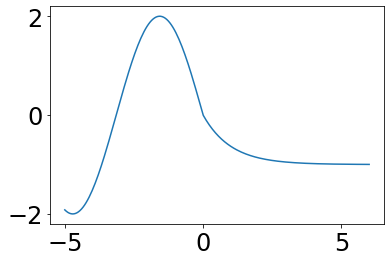

In [153]:
plt.plot(zs, exact_unscaled(zs))

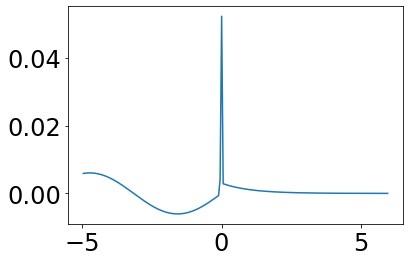

In [162]:
fs = exact_unscaled(zs)
d2fs = fs[:-2] - 2*fs[1:-1] + fs[2:]
plt.plot(zs[1:-1], d2fs)
# plt.ylim(-10000, 10000)

In [165]:
np.max(np.abs(d2fs))/h**2

13698.624407357947

In [163]:
h

0.001953125